In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """This function is the first node of our sequence."""
    state["final"] = f"Hi {state['name']}!"
    return state


def second_node(state: AgentState) -> AgentState:
    """This function is the second node of our sequence."""
    state["final"] += f" You are {state['age']} years old!"
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)

graph.set_entry_point("first")
graph.set_finish_point("second")

graph.add_edge("first", "second")

app = graph.compile()

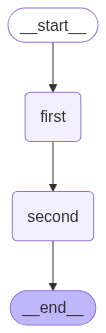

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"name": "Alice", "age": "30"})
print(result["final"])  # Output: Hi Alice! You are 30 years old!

Hi Alice! You are 30 years old!
